In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(12,5)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [15]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
data.shape

(1470, 35)

In [17]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [18]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [19]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [20]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


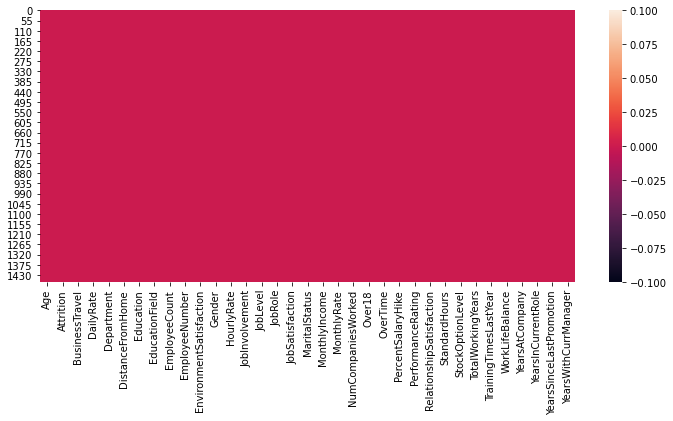

In [21]:
sns.heatmap(data.isnull())

In [22]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

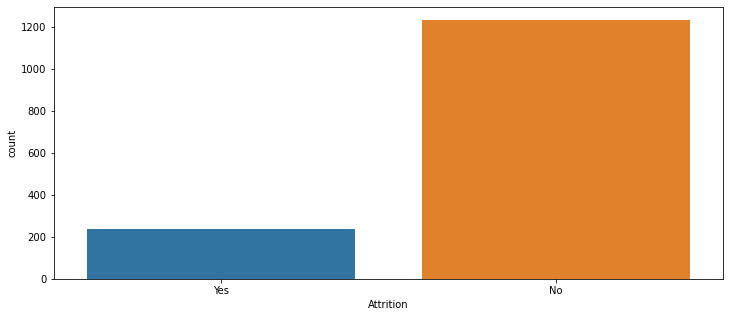

In [23]:
sns.countplot(data['Attrition'])

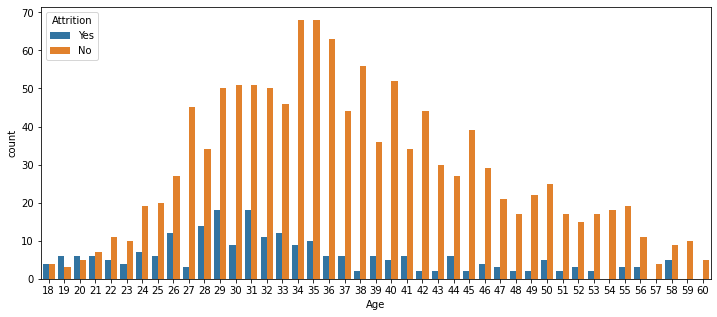

In [24]:
sns.countplot(x='Age',hue='Attrition',data=data)

In [25]:
for column in data.columns:
    if data[column].dtype==object:
        print(str(column) + ':' + str(data[column].unique()))
        print(data[column].value_counts())
        print('********************************************************')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
********************************************************
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
********************************************************
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
********************************************************
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
********************************************************
Gender:['Female' 'Male']
Male      882
Female    58

In [26]:
data=data.drop('Over18',axis=1)
data=data.drop('EmployeeNumber',axis=1)
data=data.drop('StandardHours',axis=1)
data=data.drop('EmployeeCount',axis=1)

In [27]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<Figure size 7200x7200 with 0 Axes>

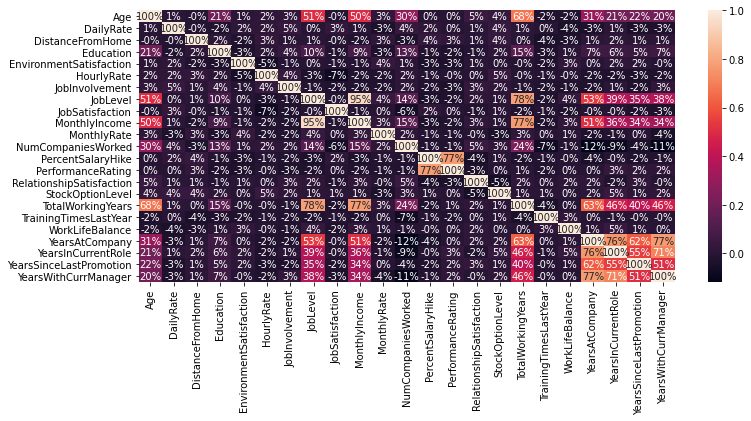

<Figure size 7200x7200 with 0 Axes>

In [28]:
sns.heatmap(data.corr(),annot=True,fmt='.0%')
plt.figure(figsize=(100,100))

In [29]:
for column in data.columns:
    if data[column].dtype == np.number:
        continue
    data[column]=LabelEncoder().fit_transform(data[column])

In [30]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,...,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,...,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,...,0,3,0,17,3,1,9,6,0,8


In [31]:
data['Age_Years']=data['Age']


In [32]:
data=data.drop('Age',axis=1)

In [33]:
data

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,2,1,11,...,2,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,3,1,12,...,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,3,1,33,...,3,0,17,3,1,9,6,0,8,31


In [34]:
x=data.iloc[:,1:data.shape[1]].values
y=data.iloc[:,0].values

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [37]:
lm.fit(x_train,y_train)

LinearRegression()

In [38]:
lm.coef_

array([ 6.63062321e-04, -5.06329314e-05,  8.32990044e-02,  3.30813593e-03,
        6.53849194e-03,  6.69481078e-03, -3.96939834e-02,  2.80744462e-02,
       -4.42239049e-05, -5.88447087e-02,  5.52304251e-02, -7.19285389e-03,
       -3.60239268e-02,  5.42115070e-02, -2.85535706e-04,  2.41853198e-05,
        1.73208636e-02,  2.05440714e-01, -6.33827526e-03,  4.32159009e-02,
       -2.48629524e-02, -2.14173840e-02, -2.58831213e-03, -1.47136372e-02,
       -4.16214862e-02,  5.75337841e-03, -8.81986961e-03,  1.06943570e-02,
       -1.10803368e-02, -4.13902124e-03])

In [39]:
lm.intercept_

0.541004650238546

In [40]:
data.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age_Years'],
      dtype='object')

In [41]:
lm.score(x_train,y_train)

0.22522082132908705

In [42]:
Age=lm.predict(x_test)
print('Predicted result price:',Age)
print('actual Age',y_test)

Predicted result price: [ 1.91895034e-01  2.58911920e-01  3.68451199e-01  1.28483252e-01
  5.16937741e-01  1.34062415e-01  5.23721444e-01  1.62302110e-01
 -1.74635640e-01  2.83429367e-01  1.52155665e-01  2.64879692e-01
 -1.35185478e-01  5.86321411e-01  2.55935803e-01  1.70979811e-02
  8.52291580e-02  2.55901410e-01  7.07697641e-02  3.13007956e-01
  2.62457552e-01  8.29855855e-02  2.34520854e-02 -2.26594573e-02
  5.42968129e-01  4.02781327e-01  1.02752207e-01  9.81276927e-02
  5.38716203e-01 -3.85800756e-02 -1.29433499e-01  6.97139453e-02
  5.84351843e-02  2.51177699e-01  3.48717479e-02  2.68478730e-02
  2.50709048e-01  9.17830199e-02  1.29389367e-03 -5.23737071e-03
  3.57531961e-02 -9.69913110e-05 -2.00525947e-02 -1.17171591e-01
 -2.75257126e-02  4.59835389e-01  3.19974935e-01 -3.26856655e-01
  6.27822700e-01  4.83384735e-01  1.97408717e-01  4.09673024e-01
  8.84530909e-02  3.13262890e-01  4.84111828e-01  3.16088956e-01
 -5.11593747e-02  2.56953467e-01 -1.28451443e-01  2.51093052e-01
 

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,Age))

print('Mean squared error:',mean_squared_error(y_test,Age))



error:
Mean absolute error: 0.23902121961563308
Mean squared error: 0.10320794558243612


In [44]:
from sklearn.metrics import r2_score
print(r2_score(y_test,Age))

0.22264556048076578


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

0.18965257569347277

In [46]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


In [47]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of LinearRegression() is: 0.22522082132908705
Error:
Mean absolute error: 0.23902121961563308
Mean squared error: 0.10320794558243612
r2_score: 0.22264556048076578
***************************************************************


Score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 0.18478260869565216
Mean squared error: 0.18478260869565216
r2_score: -0.39176863181312593
***************************************************************


Score of KNeighborsRegressor() is: 0.2887095153646415
Error:
Mean absolute error: 0.24945652173913047
Mean squared error: 0.1533695652173913
r2_score: -0.15516796440489466
***************************************************************


Score of SVR() is: -0.026662531048910365
Error:
Mean absolute error: 0.22583794980417818
Mean squared error: 0.13593842117189128
r2_score: -0.02387790593894379
***************************************************************


Score of Lasso() is: 0.04626388522108826
Error:
Mean absolute error: 0.258

In [48]:
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [49]:
ridge=Ridge(alpha=1,random_state=42)
ridge.fit(x_train,y_train)
print('Score:',ridge.score(x_train,y_train))
predrd=ridge.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrd)) 
print('Mean squared error:',mean_squared_error(y_test,predrd))
print('\n')
print('r2_score:',r2_score(y_test,predrd))

Score: 0.22521867771697457


Mean absolute error: 0.2389589797350476
Mean squared error: 0.10320388364497636


r2_score: 0.2226761546864694


In [50]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrf)) 
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('\n')
print('r2_score:',r2_score(y_test,predrf))

Score: 0.8679670372903514


Mean absolute error: 0.22160326086956522
Mean squared error: 0.11624320652173914


r2_score: 0.12446496106785299


In [51]:
from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predadb)) 
print('Mean squared error:',mean_squared_error(y_test,predadb))
print('\n')
print('r2_score:',r2_score(y_test,predadb))

Score: 0.029147839209359483


Mean absolute error: 0.28942767152747206
Mean squared error: 0.13196556289254752


r2_score: 0.006045362115664199


In [52]:
import joblib
joblib.dump(rf,'WA_Fn-UseC_-HR-Employee-Attrition.csv')

['WA_Fn-UseC_-HR-Employee-Attrition.csv']